# **Stock (BRIS) Predictive Modelling**

## **Data Load & Understanding**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieve the dataset
dataset = '/content/gdrive/MyDrive/Project/Stock Prediction/Data/Cleaned Data/BRIS_Cleaned.csv'
df = pd.read_csv(dataset)

Mounted at /content/gdrive


The data used in the research in this code is data that has been cleaned/pre-processed, so that the existing data is ready to be used in the modeling stage.

In [ ]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,525.0,525.0,525.0,525.0,514.760742,0.0
1,2019-01-01,525.0,525.0,525.0,525.0,514.760742,0.0
2,2019-01-02,520.0,530.0,515.0,520.0,509.858215,2485300.0
3,2019-01-03,520.0,530.0,515.0,525.0,514.760742,5963500.0
4,2019-01-04,525.0,540.0,520.0,530.0,519.663208,10669300.0
...,...,...,...,...,...,...,...
935,2023-12-21,1765.0,1765.0,1680.0,1690.0,1690.000000,25310000.0
936,2023-12-22,1690.0,1725.0,1685.0,1695.0,1695.000000,9421600.0
937,2023-12-27,1695.0,1705.0,1685.0,1695.0,1695.000000,10923600.0
938,2023-12-28,1695.0,1745.0,1685.0,1740.0,1740.000000,23222700.0


In [ ]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       940 non-null    object 
 1   Open       940 non-null    float64
 2   High       940 non-null    float64
 3   Low        940 non-null    float64
 4   Close      940 non-null    float64
 5   Adj Close  940 non-null    float64
 6   Volume     940 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.5+ KB


In [ ]:
# Check the number of columns and rows in the data
df.shape

(940, 7)

In [ ]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,940.000000,940.000000,940.000000,940.00000,940.000000,9.400000e+02
mean,1206.455806,1222.134765,1187.820628,1200.18211,1187.006593,1.457930e+07
std,680.556267,688.982751,668.799017,675.61032,668.177255,1.152638e+07
min,136.000000,155.000000,135.000000,135.00000,132.632324,0.000000e+00
25%,505.000000,510.000000,500.000000,505.00000,496.143097,5.504962e+06
50%,1432.500000,1452.500000,1412.500000,1420.00000,1411.147827,1.080605e+07
75%,1675.000000,1695.000000,1655.000000,1670.00000,1666.109619,2.203215e+07
max,3380.000000,3380.000000,3190.000000,3190.00000,3134.052734,4.659440e+07


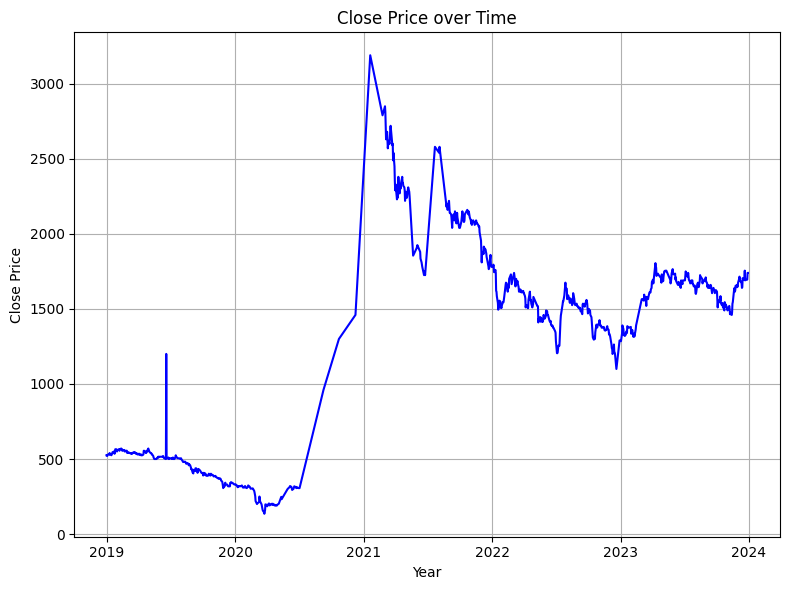

In [ ]:
# Visualize the actual price of the 'Close' attribute by time

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='blue')

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Close Price')

# Format the x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Chart title
plt.title('Close Price over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

The visualization is the closing price (close) of JKSE which has been summarized and later predictions will be made to determine the value with several models that will be tried.

## **Data Pre-Processing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### **Data Splitting**

In [ ]:
training_set = df.iloc[:, 4:5].values #creates a numpy array training_set

In [ ]:
training_set.dtype

dtype('float64')

In [ ]:
training_set

array([[ 525.        ],
       [ 525.        ],
       [ 520.        ],
       [ 525.        ],
       [ 530.        ],
       [ 530.        ],
       [ 530.        ],
       [ 540.        ],
       [ 530.        ],
       [ 530.        ],
       [ 525.        ],
       [ 530.        ],
       [ 535.        ],
       [ 545.        ],
       [ 545.        ],
       [ 550.        ],
       [ 540.        ],
       [ 535.        ],
       [ 540.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 550.        ],
       [ 560.        ],
       [ 560.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 565.        ],
       [ 570.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 555.        ],
       [ 560.        ],
       [ 560.        ],
       [ 560.        ],
       [ 550.        ],
       [ 550.        ],
       [ 555.        ],
       [ 555.        ],
       [ 555.   

In [ ]:
training_set.shape

(940, 1)

### **Normalization (Feature Scaling)**

In [ ]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.12765957],
       [0.12765957],
       [0.12602291],
       [0.12765957],
       [0.12929624],
       [0.12929624],
       [0.12929624],
       [0.13256956],
       [0.12929624],
       [0.12929624],
       [0.12765957],
       [0.12929624],
       [0.1309329 ],
       [0.13420622],
       [0.13420622],
       [0.13584288],
       [0.13256956],
       [0.1309329 ],
       [0.13256956],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13584288],
       [0.1391162 ],
       [0.1391162 ],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.14075286],
       [0.14238953],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13747954],
       [0.1391162 ],
       [0.1391162 ],
       [0.1391162 ],
       [0.13584288],
       [0.13584288],
       [0.13747954],
       [0.13747954],
       [0.13747954],
       [0.13256956],
       [0.13420622],
       [0.13420622],
       [0.13256956],
       [0.13256956],
       [0.132

In [ ]:
training_set_scaled.shape

(940, 1)

### **Creating Data Structure**

In [ ]:
X_train = training_set_scaled
Y_train = training_set_scaled

# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train

array([[0.12765957],
       [0.12765957],
       [0.12602291],
       [0.12765957],
       [0.12929624],
       [0.12929624],
       [0.12929624],
       [0.13256956],
       [0.12929624],
       [0.12929624],
       [0.12765957],
       [0.12929624],
       [0.1309329 ],
       [0.13420622],
       [0.13420622],
       [0.13584288],
       [0.13256956],
       [0.1309329 ],
       [0.13256956],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13584288],
       [0.1391162 ],
       [0.1391162 ],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.14075286],
       [0.14238953],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13747954],
       [0.1391162 ],
       [0.1391162 ],
       [0.1391162 ],
       [0.13584288],
       [0.13584288],
       [0.13747954],
       [0.13747954],
       [0.13747954],
       [0.13256956],
       [0.13420622],
       [0.13420622],
       [0.13256956],
       [0.13256956],
       [0.132

In [ ]:
X_train.shape

(940, 1)

### **Reshaping**

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train

array([[[0.12765957]],

       [[0.12765957]],

       [[0.12602291]],

       [[0.12765957]],

       [[0.12929624]],

       [[0.12929624]],

       [[0.12929624]],

       [[0.13256956]],

       [[0.12929624]],

       [[0.12929624]],

       [[0.12765957]],

       [[0.12929624]],

       [[0.1309329 ]],

       [[0.13420622]],

       [[0.13420622]],

       [[0.13584288]],

       [[0.13256956]],

       [[0.1309329 ]],

       [[0.13256956]],

       [[0.14075286]],

       [[0.14075286]],

       [[0.13747954]],

       [[0.13584288]],

       [[0.1391162 ]],

       [[0.1391162 ]],

       [[0.14075286]],

       [[0.14075286]],

       [[0.13747954]],

       [[0.14075286]],

       [[0.14238953]],

       [[0.14075286]],

       [[0.14075286]],

       [[0.13747954]],

       [[0.13747954]],

       [[0.1391162 ]],

       [[0.1391162 ]],

       [[0.1391162 ]],

       [[0.13584288]],

       [[0.13584288]],

       [[0.13747954]],

       [[0.13747954]],

       [[0.13747

## **Modelling & Evaluation**

### **Long Short-Term Memory (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### **Building LSTM Architecture**

In [ ]:
# Creating a LSTM model
lstm_model = Sequential()

# Adding a LSTM layer
lstm_model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = False))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(units= 1))

# Compile the LSTM model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### **Training LSTM Model**

In [ ]:
# Train the LSTM model
lstm_model.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 8s 11ms/step - loss: 0.1234
Epoch 2/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0395
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0231
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0070
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 7/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 8/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 9/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 10/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 11/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 12/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 13/100
30/30 [=====

#### **Testing LSTM Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[ 525.        ],
       [ 525.        ],
       [ 520.        ],
       [ 525.        ],
       [ 530.        ],
       [ 530.        ],
       [ 530.        ],
       [ 540.        ],
       [ 530.        ],
       [ 530.        ],
       [ 525.        ],
       [ 530.        ],
       [ 535.        ],
       [ 545.        ],
       [ 545.        ],
       [ 550.        ],
       [ 540.        ],
       [ 535.        ],
       [ 540.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 550.        ],
       [ 560.        ],
       [ 560.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 565.        ],
       [ 570.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 555.        ],
       [ 560.        ],
       [ 560.        ],
       [ 560.        ],
       [ 550.        ],
       [ 550.        ],
       [ 555.        ],
       [ 555.        ],
       [ 555.   

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.12765957],
       [0.12765957],
       [0.12602291],
       [0.12765957],
       [0.12929624],
       [0.12929624],
       [0.12929624],
       [0.13256956],
       [0.12929624],
       [0.12929624],
       [0.12765957],
       [0.12929624],
       [0.1309329 ],
       [0.13420622],
       [0.13420622],
       [0.13584288],
       [0.13256956],
       [0.1309329 ],
       [0.13256956],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13584288],
       [0.1391162 ],
       [0.1391162 ],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.14075286],
       [0.14238953],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13747954],
       [0.1391162 ],
       [0.1391162 ],
       [0.1391162 ],
       [0.13584288],
       [0.13584288],
       [0.13747954],
       [0.13747954],
       [0.13747954],
       [0.13256956],
       [0.13420622],
       [0.13420622],
       [0.13256956],
       [0.13256956],
       [0.132

In [ ]:
inputs.shape

(940, 1)

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_lstm = lstm_model.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)

30/30 [==============================] - 2s 3ms/step


In [ ]:
predicted_stock_price_lstm

array([[ 546.1174 ],
       [ 546.1174 ],
       [ 541.7547 ],
       [ 546.1174 ],
       [ 550.4867 ],
       [ 550.4867 ],
       [ 550.4867 ],
       [ 559.24475],
       [ 550.4867 ],
       [ 550.4867 ],
       [ 546.1174 ],
       [ 550.4867 ],
       [ 554.8624 ],
       [ 563.63367],
       [ 563.63367],
       [ 568.02905],
       [ 559.24475],
       [ 554.8624 ],
       [ 559.24475],
       [ 581.2541 ],
       [ 581.2541 ],
       [ 572.4309 ],
       [ 568.02905],
       [ 576.83923],
       [ 576.83923],
       [ 581.2541 ],
       [ 581.2541 ],
       [ 572.4309 ],
       [ 581.2541 ],
       [ 585.67535],
       [ 581.2541 ],
       [ 581.2541 ],
       [ 572.4309 ],
       [ 572.4309 ],
       [ 576.83923],
       [ 576.83923],
       [ 576.83923],
       [ 568.02905],
       [ 568.02905],
       [ 572.4309 ],
       [ 572.4309 ],
       [ 572.4309 ],
       [ 559.24475],
       [ 563.63367],
       [ 563.63367],
       [ 559.24475],
       [ 559.24475],
       [ 559.

In [ ]:
predicted_stock_price_lstm.shape

(940, 1)

In [ ]:
# Add the predicted values to the DataFrame
df['LSTM Predictions'] = predicted_stock_price_lstm

# Print or visualize the results as needed
df[['Date', 'Close', 'LSTM Predictions']]

,Date,Close,LSTM Predictions
0,2018-12-31,525.0,546.117371
1,2019-01-01,525.0,546.117371
2,2019-01-02,520.0,541.754700
3,2019-01-03,525.0,546.117371
4,2019-01-04,530.0,550.486694
...,...,...,...
935,2023-12-21,1690.0,1694.000122
936,2023-12-22,1695.0,1699.165039
937,2023-12-27,1695.0,1699.165039
938,2023-12-28,1740.0,1745.555176


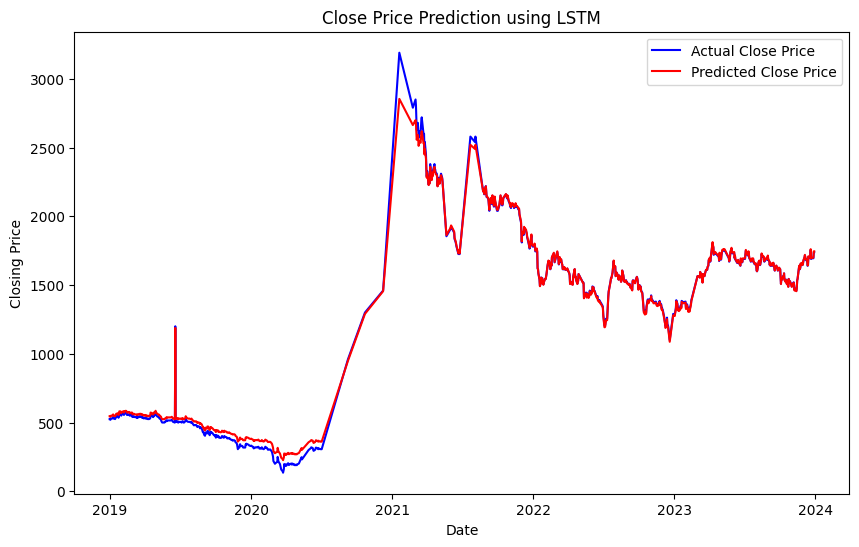

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['LSTM Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = lstm_model.predict(X_train)

# Calculate MSE
mse_lstm = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_lstm = sqrt(mse_lstm)

# Calculating MAPE
mape_lstm = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lstm}%')

30/30 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.00010824360241892331
Root Mean Squared Error (RMSE): 0.010404018570673704
Mean Absolute Percentage Error (MAPE): 317378.31866062427%


#### **Saving LSTM Model**

In [ ]:
from keras.models import load_model
lstm_model.save('BRIS_LSTM_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Gated Recurrent Unit (GRU)**

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

#### **Building GRU Architecture**

In [ ]:
# Creating a GRU model
gru_model = Sequential()

# Adding a GRU layer
gru_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=False))
gru_model.add(Dropout(0.25))
gru_model.add(Dense(units=1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

#### **Training GRU Model**

In [ ]:
# Train the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 9s 7ms/step - loss: 0.0693
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0182
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 8/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 11/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 12/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 13/100
30/30 [=================

#### **Testing GRU Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[ 525.        ],
       [ 525.        ],
       [ 520.        ],
       [ 525.        ],
       [ 530.        ],
       [ 530.        ],
       [ 530.        ],
       [ 540.        ],
       [ 530.        ],
       [ 530.        ],
       [ 525.        ],
       [ 530.        ],
       [ 535.        ],
       [ 545.        ],
       [ 545.        ],
       [ 550.        ],
       [ 540.        ],
       [ 535.        ],
       [ 540.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 550.        ],
       [ 560.        ],
       [ 560.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 565.        ],
       [ 570.        ],
       [ 565.        ],
       [ 565.        ],
       [ 555.        ],
       [ 555.        ],
       [ 560.        ],
       [ 560.        ],
       [ 560.        ],
       [ 550.        ],
       [ 550.        ],
       [ 555.        ],
       [ 555.        ],
       [ 555.   

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.12765957],
       [0.12765957],
       [0.12602291],
       [0.12765957],
       [0.12929624],
       [0.12929624],
       [0.12929624],
       [0.13256956],
       [0.12929624],
       [0.12929624],
       [0.12765957],
       [0.12929624],
       [0.1309329 ],
       [0.13420622],
       [0.13420622],
       [0.13584288],
       [0.13256956],
       [0.1309329 ],
       [0.13256956],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13584288],
       [0.1391162 ],
       [0.1391162 ],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.14075286],
       [0.14238953],
       [0.14075286],
       [0.14075286],
       [0.13747954],
       [0.13747954],
       [0.1391162 ],
       [0.1391162 ],
       [0.1391162 ],
       [0.13584288],
       [0.13584288],
       [0.13747954],
       [0.13747954],
       [0.13747954],
       [0.13256956],
       [0.13420622],
       [0.13420622],
       [0.13256956],
       [0.13256956],
       [0.132

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_gru = gru_model.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

30/30 [==============================] - 2s 3ms/step


In [ ]:
predicted_stock_price_gru

array([[ 543.8785 ],
       [ 543.8785 ],
       [ 538.87213],
       [ 543.8785 ],
       [ 548.8874 ],
       [ 548.8874 ],
       [ 548.8874 ],
       [ 558.9123 ],
       [ 548.8874 ],
       [ 548.8874 ],
       [ 543.8785 ],
       [ 548.8874 ],
       [ 553.8986 ],
       [ 563.92834],
       [ 563.92834],
       [ 568.94684],
       [ 558.9123 ],
       [ 553.8986 ],
       [ 558.9123 ],
       [ 584.0165 ],
       [ 584.0165 ],
       [ 573.9677 ],
       [ 568.94684],
       [ 578.99084],
       [ 578.99084],
       [ 584.0165 ],
       [ 584.0165 ],
       [ 573.9677 ],
       [ 584.0165 ],
       [ 589.0443 ],
       [ 584.0165 ],
       [ 584.0165 ],
       [ 573.9677 ],
       [ 573.9677 ],
       [ 578.99084],
       [ 578.99084],
       [ 578.99084],
       [ 568.94684],
       [ 568.94684],
       [ 573.9677 ],
       [ 573.9677 ],
       [ 573.9677 ],
       [ 558.9123 ],
       [ 563.92834],
       [ 563.92834],
       [ 558.9123 ],
       [ 558.9123 ],
       [ 558.

In [ ]:
# Add the predicted values to the DataFrame
df['GRU Predictions'] = predicted_stock_price_gru

# Print or visualize the results as needed
df[['Date', 'Close', 'GRU Predictions']]

,Date,Close,GRU Predictions
0,2018-12-31,525.0,543.878479
1,2019-01-01,525.0,543.878479
2,2019-01-02,520.0,538.872131
3,2019-01-03,525.0,543.878479
4,2019-01-04,530.0,548.887390
...,...,...,...
935,2023-12-21,1690.0,1746.145874
936,2023-12-22,1695.0,1751.305298
937,2023-12-27,1695.0,1751.305298
938,2023-12-28,1740.0,1797.670044


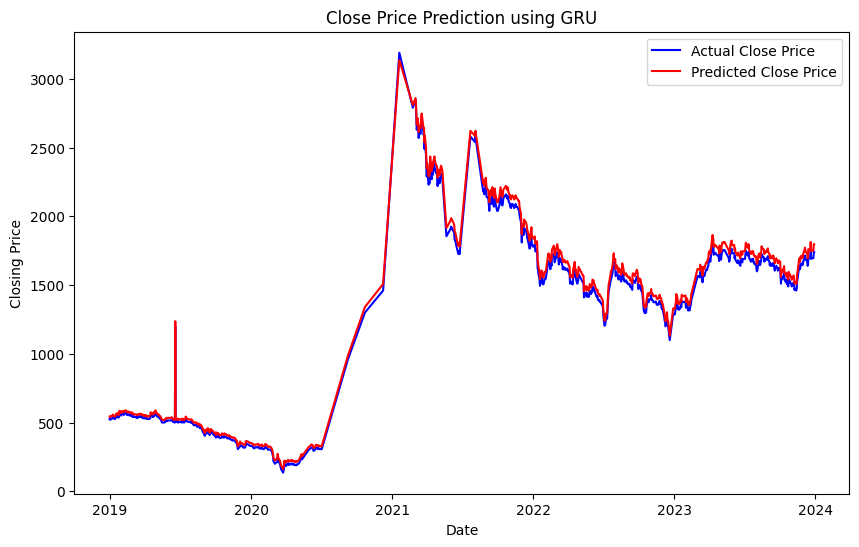

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['GRU Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using GRU')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = gru_model.predict(X_train)

# Calculate MSE
mse_gru = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_gru = sqrt(mse_gru)

# Calculating MAPE
mape_gru = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_gru}%')

30/30 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 0.00019957321881773136
Root Mean Squared Error (RMSE): 0.014127038572104606
Mean Absolute Percentage Error (MAPE): 92590.82145903351%


#### **Saving GRU Model**

In [ ]:
from keras.models import load_model
gru_model.save('BRIS_GRU_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Conclusion**

In [ ]:
model_comparison = pd.DataFrame({'Model': ['LSTM','GRU'], 'MSE': [mse_lstm,mse_gru], 'RMSE': [rmse_lstm,rmse_gru], 'MAPE': [mape_lstm*100,mape_gru*100]})
model_comparison

,Model,MSE,RMSE,MAPE
0,LSTM,0.000108,0.010404,3.173783e+07
1,GRU,0.000200,0.014127,9.259082e+06
